# Project Group 35 

Members: Tieme van Hijum (4923588), Emma van den Brink (5136008), Sil Havinga (4730321)

Date: 8-11-2024

Github: https://github.com/TiemevH/TILProgramming-Group35.git 

# Research Objective

This study explores the development over time in the proportion of the population of The Netherlands that falls outside this maximum distance to a hospital. Using data modeling and quantitative research, this investigation will analyze the trends in hospital accessibility across different regions of the Netherlands. Additionally, it aims to provide insights into how changes in population density, hospital location, and infrastructure impact the ability to meet the 45-minute target, with implications for future policy decisions.

# Introduction

Access to healthcare is a fundamental right in modern society. Every resident should be within reach of timely medical assistance. In the 1960s, a standard was established in the Netherlands stipulating that every citizen should be able to reach a hospital within 45 minutes in the event of an emergency (Skipr Redactie, 2013). This standard breaks down into three key components: 15 minutes for emergency response time, 5 minutes for care at the scene, and 25 minutes for transport to a hospital. However, this target has been scrutinized, with reports indicating that the threshold is rarely met in some regions, while it is occasionally missed in others (Centraal Bureau voor de Statistiek, 2009).

Now, for this research we have to calculate the maximum distance someone can live from a hospital in terms of kilomters, not in terms of time. There is not much information to be found on how fast cars travel on average. There is however information on ambulance driving behaviour. For ease of analysis we assume that the average speed of the vehicle is 60 km/h when driving for an emergancy (Dossier Aanrijtijden Ambulance | HMC, 2022). Combining this with the 25 minutes for transport to a hospital, this means that people should live within a 25 km radius to a hospital. 

Since we want to analyse the difference over time of the proportion of people living outside of this radius, we have to plot data over a certain time scale. First, we only found data from the last few years. This was not enough to draw any conclusions from. Therefore we extended our search and in the end have data available from 2007 until 2022. This data was retrieved from the CBS Open data Statline.


In [1]:
#importing necessary packages
import matplotlib.pyplot as plt
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib
import plotly.express as px
from matplotlib.ticker import FuncFormatter

# Data import and Regions

Firstly, the regions that were used in order to display the proximity data of hospitals were imported. These regions ofcourse have to line up with the same regions as in the dataset. The dataset was also imported in the code below. In order to sufficiently evaluate the proximity to hospitals of the inhabitants of the Netherlands as much detail as possible is desired. It was chosen to gather and plot the available data on a district area scale. This was done to provide more detail than for example municipality scale but to make sure that as little changes as possbile in area definition where introduced. The more detailed neighbourhood scale was found to have too many area definition changes year over year making direct comparisons difficult. Figure 1 below shows the district regions for 2007 that where used to evaluate the data of 2007. Every subsequent year of data is plotted on the district region map of the same year the data is from.

In [2]:
#Setting up an empty dictionary of all datasets, so each dataset can be individually called when needed
dataset = dict()
years = range(2007,2023)
for year in years:
    #First, loading in the shapefile
    dataset[year] = gpd.read_file(f'AreaGeodata/Wijken{year}.shp')
    #Second, setting the areacode as the index, for convention
    dataset[year] = dataset[year].set_index('statcode')
    #Third, the proximities and inhabitants per area are loaded separately, sorting by areacode so it is 
    #guaranteed that the indexes match
    proximities = pd.read_csv(f'ProximitiesPerArea/Proximities{year}.csv',
                              index_col = 'WijkenEnBuurten').sort_values(by = 'WijkenEnBuurten')
    
    inhabitants = pd.read_csv(f'PopulationData/Bewoners{year}.csv',
                              index_col = 'WijkenEnBuurten').sort_values(by = 'WijkenEnBuurten')
    
    #Lastly, adding the proximities, inahbitants and year per area as a new column to the dataset
    dataset[year]['AfstandTotZiekenhuis_11'] = proximities['AfstandTotZiekenhuis_11'].tolist()
    dataset[year]['AantalInwoners_5'] = inhabitants['AantalInwoners_5'].tolist()
    dataset[year]['Year'] = year

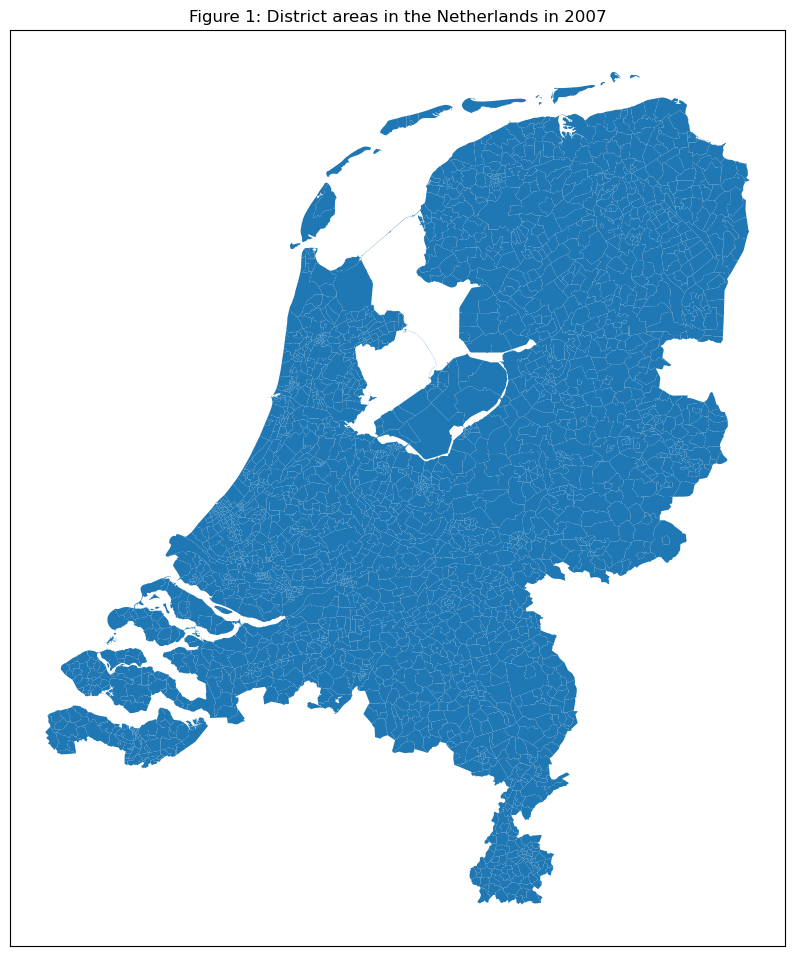

In [3]:
#An example of a plot of just the areas in 2007
dataset[2007].plot(figsize = (10,30))

#Removing x and y axis ticks since they are not relevant
plt.xticks([])
plt.yticks([])

plt.title('Figure 1: District areas in the Netherlands in 2007')
plt.show()

# Visualizing hospital prodiximity data

In order to asses the distance to hospital for different areas in the Netherlands the hospital proximity data was plotted onto the district area data. To visualise the maximum limit of 25 kilometers better, all regions with a hospital further than 25 kilometers are colored black in the graph below. From figure 2 it becomes clear that, in the year 2007, certain areas in the Netherlands are not within the 25 kilometer limit of the nearest hospital. This is especially the case for the Waddenislands and for areas Friesland, Groningen and Zeeland.

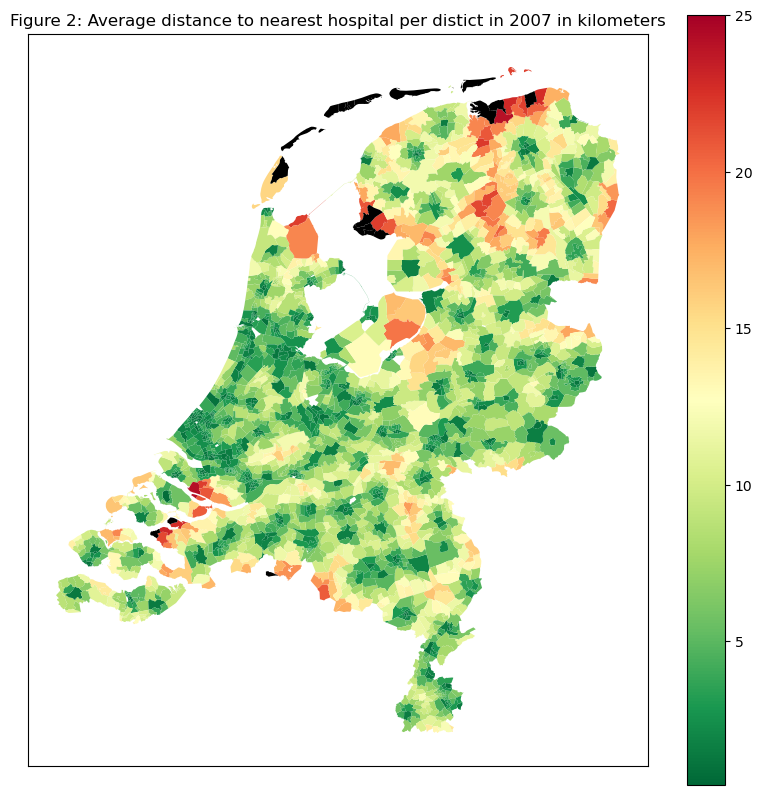

In [4]:
#Plotting the distance to hospital data onto the area plot
fig, ax = plt.subplots(figsize = (10,10))

#Plotting all values under 25 kilometers using a green to red colourmap
dataset[2007][dataset[2007]['AfstandTotZiekenhuis_11'] < 25].plot(ax=ax, vmax=25,
                                                                  column='AfstandTotZiekenhuis_11',
                                                                  legend=True, cmap='RdYlGn_r')

#Plotting all values over 25 kilometers in black
dataset[2007][dataset[2007]['AfstandTotZiekenhuis_11'] >= 25].plot(ax=ax, color='black', legend=True)

#Removing x and y axis ticks since they are not relevant
plt.xticks([])
plt.yticks([])

plt.title('Figure 2: Average distance to nearest hospital per distict in 2007 in kilometers')
plt.show()

# Hospital proximity per district over time

In order to provide valueable insights and trends in the proximity of hospitals to the inhabitants of the Netherlands the hospital proximity data of the years 2007 until 2022 was plotted in figure 3.

When looking at figure 3 some interesting developments over time can be noticed. Firslty, from 2007 to 2008 and then from 2008 to 2009 the proximity values in the east of Zeeland improve significantly, it is unclear where this exactly comes from but it most likely due to existing policlinic changes such as extended care tasks that now enable it to be considered a hospital in this dataset. Next to that, from 2009 to 2010 it can be seen that the proximity values of an area in the southwest of Friesland improve considerably, this is due the opening of a policlinic in Lemmer, Friesland (Huisartsenpratijk Arentsen en Groeneveld, n.d.). Another signifcant change is on the island of Texel from 2012 to 2013, this is due to the opening of the policlinic on the island (NH Nieuws, 2011). The final big change that can be see is in the north of Groningen and Friesland from 2015 to 2016, this is due to the closure of the hospital in Dokkum (NOS, 2014).

These are the changes in hospital proximity that where noted by comapring the maps, since small changes on these maps might not be noted at first a further analysis is necessary to draw conclusions. This is done in the next part.

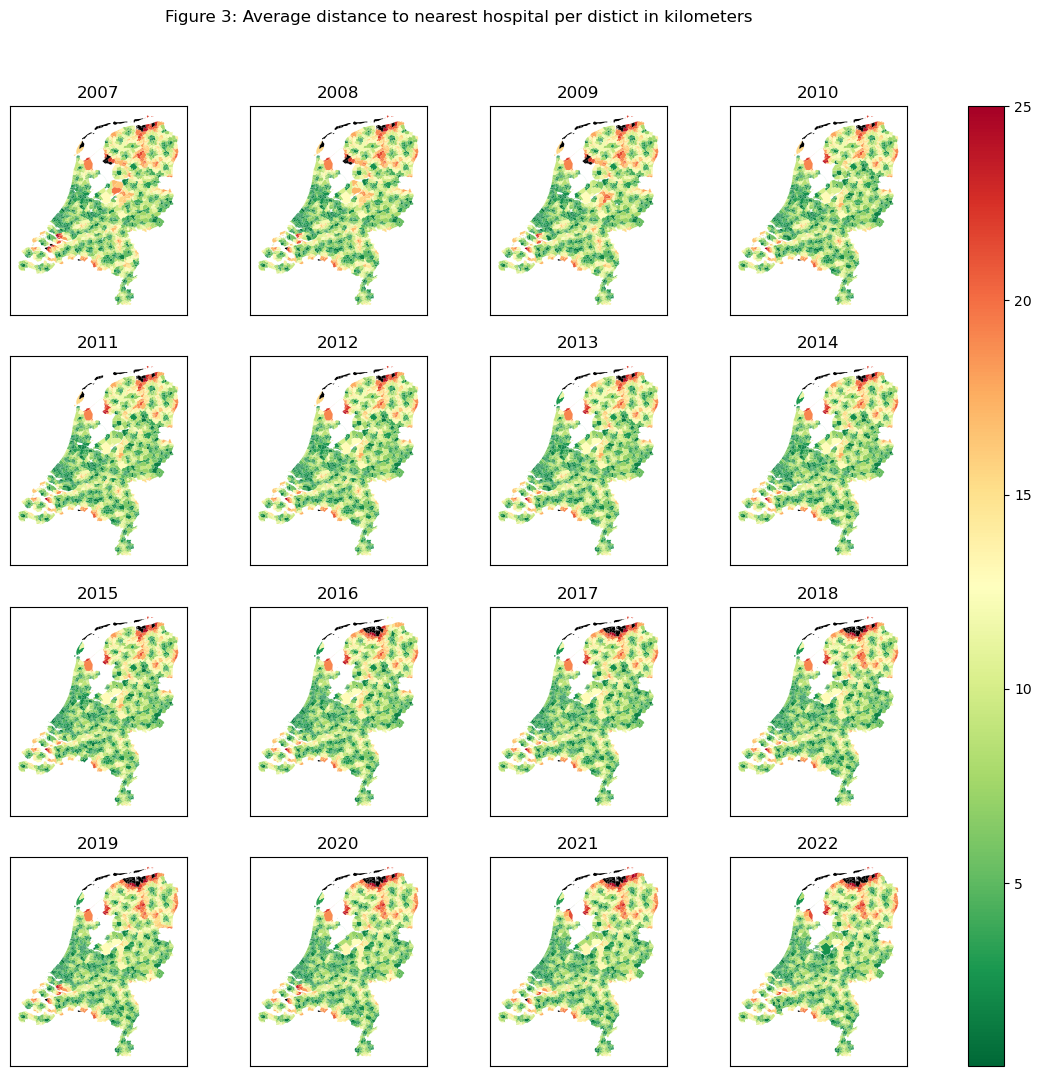

In [5]:
#Create a figure with 16 maps so all years from 2007 to 2022 are shown next to each other.
fig, axs = plt.subplots(nrows=4, ncols=4, sharex='col', sharey='row', figsize = (12,12))

#Plot the data of each year in the right subplot, giving these subplots a title and removing x and y ticks.
for i in range(0,4):
    for j in range(0,4):
        dataset[2007 + i*4 + j][dataset[2007 + i*4 + j]\
               ['AfstandTotZiekenhuis_11'] < 25].plot(ax=axs[i][j], vmax=25,
                                                      column='AfstandTotZiekenhuis_11',
                                                      legend=False, cmap='RdYlGn_r')
        dataset[2007 + i*4 + j][dataset[2007 + i*4 + j]\
               ['AfstandTotZiekenhuis_11'] >= 25].plot(ax=axs[i][j], color='black', legend=False)
        axs[i][j].set_title(2007 + i*4 + j)
        axs[i][j].set_xticks([])
        axs[i][j].set_yticks([])

#Adding colorbar
fig.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0, hspace=None)
im = plt.gca().get_children()[0]
cax = fig.add_axes([0.925,0.1,0.03,0.8]) 
fig.colorbar(im, cax=cax)

#Adding title
fig.suptitle('Figure 3: Average distance to nearest hospital per distict in kilometers')
plt.show()

# Introducing inhabitant data to hospital proximity

In order to further analyse the changes in hospital proximity for the inhabitants of the Netherlands inhabitant data is used. This data contains how many people live in each respective district that is used for the plots shown above. Visualizing this data on a map is not very useful but with the help of inhabitant data several plots can be made that provide a better insight in the hospital proximity of certain areas and of the Netherlands as a whole.

# Amount of inhabitant - Hospital proximity analysis

In this part graphs where created that show the amount of inhabitants with respect to the hosptital proximity. This is partially meant to validate the changes found in the maps above and partially meant to provide deeper insights. 

Figure 4 shows the cumulative inhabitant distribution over the distance to hospital. From this figure it is clear that by far most inhabitants live within the 25 kilometer limit of a hospital. Figure 4 also shows a clear total inhabitant increase over the year, as was expected. Next to that it can also be seen that the distance to hospital of the furtherst away inhabitants, and thus districts in this case, increases significantly over time.

In order to better analyse the area that is interesting for this research a new plot of all inhabitants living more than 25 kilometers away from the nearest hospital was made. This is shown in figure 5. This figure clearly shown that in the beginning of the time series, from 2007 to 2015 the total amount of inhabitants living further than 25 kilometers away from hospital steadily decreases, despite the earlier in figure 4 shown overall national population growth. However in from 2015 to 2016 a drastic change or jump is observed and suddenly around double the amount of inhabitants live too far away from hospital, altough the grpah suggest that most of these inhabitants live only slighty too far away at around 26 kilometers. This change is due to the hospital closure in Dokkum as descirbed above. Since this jump the amount of inhabitants increases over time, this might be somewhat caused by population growth but this is unlikely to explain this entire effect since most locations that are too far from hospital are rural and are not expected to have a significant population growth, these areas might even be effected by population decline. Wheter this effect can be attributed to population growth is investigated in the next part.

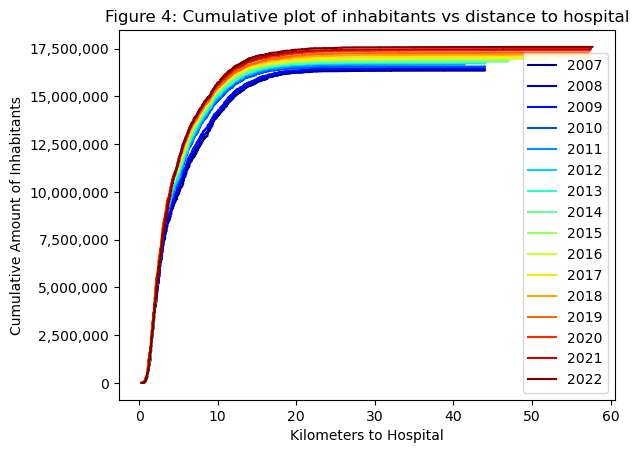

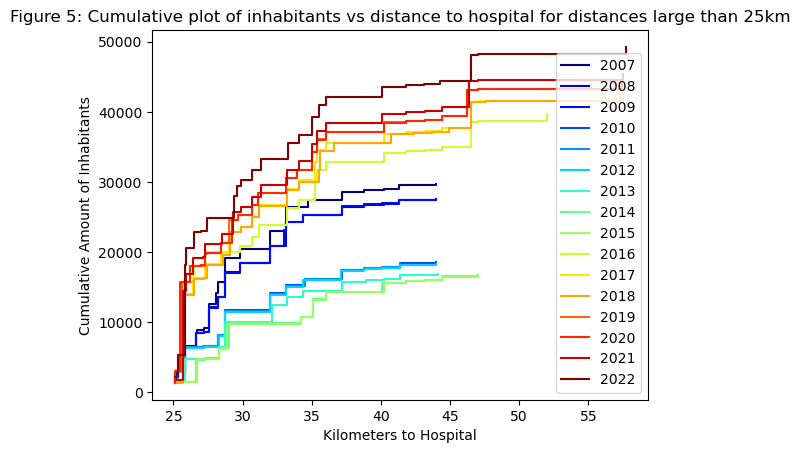

In [6]:
#creating colormap
colors = plt.cm.jet(np.linspace(0, 1, len(range(2007,2023))))

#calling data, sorting data and plotting data with a step plot. 
#(step plots are used since a whole district population has one certain distance to hospital).
for i, year in enumerate(range(2007, 2023)):   
    data = dataset[year][['AantalInwoners_5', 'AfstandTotZiekenhuis_11']]
    sorted_data = data.sort_values('AfstandTotZiekenhuis_11')
    plt.step(sorted_data['AfstandTotZiekenhuis_11'], np.cumsum(sorted_data['AantalInwoners_5']), where='post', label=year, color=colors[i])
    
plt.legend()
plt.xlabel('Kilometers to Hospital')
plt.ylabel('Cumulative Amount of Inhabitants')
plt.title('Figure 4: Cumulative plot of inhabitants vs distance to hospital')

#setting the y-label ticks to show a full number instead of scientific notation.
def format_func(value, tick_number):
    return f'{int(value):,}'
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_func))
plt.show()

#creating a second plot
#calling data, filtering data to only show districts > 25km away, sorting data and plotting data with a step plot. 
for i, year in enumerate(range(2007, 2023)):   
    data = dataset[year][['AantalInwoners_5', 'AfstandTotZiekenhuis_11']]
    filtered_data = data[data['AfstandTotZiekenhuis_11'] > 25]
    sorted_data = filtered_data.sort_values('AfstandTotZiekenhuis_11')
    plt.step(sorted_data['AfstandTotZiekenhuis_11'], np.cumsum(sorted_data['AantalInwoners_5']), where='post', label=year, color=colors[i])
    
plt.legend()
plt.xlabel('Kilometers to Hospital')
plt.ylabel('Cumulative Amount of Inhabitants')
plt.title('Figure 5: Cumulative plot of inhabitants vs distance to hospital for distances large than 25km')
plt.show()

# More detailed hospital proximity data analysis

To further investigate the observations that where made above a more detailed analysis was done. Now, per year, the percentage of inhabitants is used in stead of the absolute amount of inhabitants. This was done to compensate for potential developments in population in The Netherlands. What can be seen in figure 6 is that there are jumps in the percentage of people living outside the 25 km radius. This is as expected since the opening and closure of different hospitals of policlinics was already found. However it is also clearly shown in figure 6 that in the recent years since 2016 the amount of inhabitants living too far away from hospital also increases when calaculated as a percentage of the total population. In other words, population increase is clearly not the only factor and either the areas that are far away from hospital grow faster than average which is highly inlikely or more hospitals or policlinics where also closed in recent years. District area corrections could also account for some of this effect but these corrections are usually small and are expected to have little overal effect. It is also quite clear that overall only a very small part, around 0.1 to 0.3% of the total population lives in districts that are too far away from the nearest hospital, although this share is increasing over recent years.

To investigate what can be done to improve the current situation a plot was made with the distance of districts to the nearest hospital and their population. This plot is shown in figure 7. From this figure is becomes clear that most districts that are too far away from hospital have a small population, there is one outlier though, this outlier does have a rather large population and thus an improvement in distance to hospital for this district can be very benificial. This district is the district where Dokkum is located. This is also the location of the recent hospital closure. Creating a policlinic here might be a good solution to significantly decrease the amount of people that live too far from the nearest hospital. 

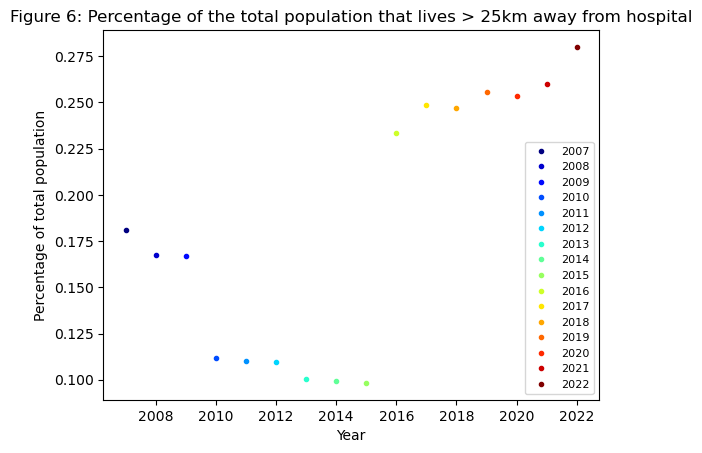

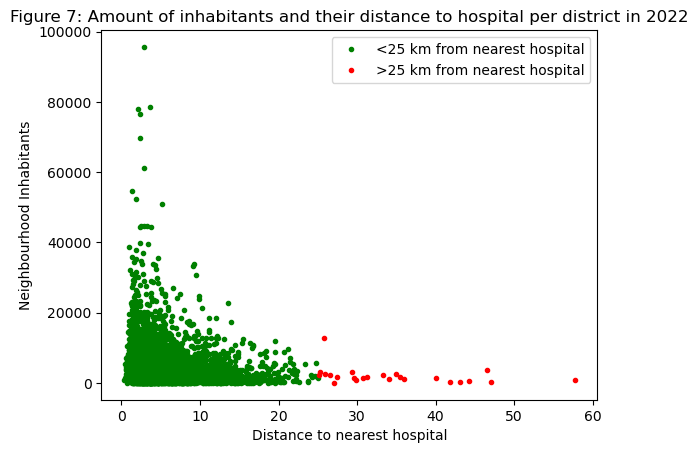

In [7]:
#calling data, filtering data to only show districts > 25 km away, sorting data and plotting data with a step plot.
#a summation was added to be able to calculate the percentage of inhabitants of the total population
for i, year in enumerate(range(2007, 2023)):   
    data = dataset[year][['AantalInwoners_5', 'AfstandTotZiekenhuis_11']]
    filtered_data = data[data['AfstandTotZiekenhuis_11'] > 25]
    sorted_data = filtered_data.sort_values('AfstandTotZiekenhuis_11')
    total_sum = sum(sorted_data['AantalInwoners_5'])
    total_inhabitants = sum(data['AantalInwoners_5'])

    plt.plot(year, np.sum(total_sum/total_inhabitants*100), '.', label=year, color=colors[i])
    
plt.legend(loc='lower right', prop={'size': 8})
plt.xlabel('Year')
plt.ylabel('Percentage of total population')
plt.title('Figure 6: Percentage of the total population that lives > 25km away from hospital')
plt.show()

#creating a second plot
#calling and sorting data
data = dataset[2022][['AantalInwoners_5', 'AfstandTotZiekenhuis_11']]
sorted_data = data.sort_values('AfstandTotZiekenhuis_11')

#filtering data to be able to show different colours for values below and above 25 km.
filtered_data_a = sorted_data[sorted_data['AfstandTotZiekenhuis_11'] <=25]
filtered_data_b = sorted_data[sorted_data['AfstandTotZiekenhuis_11'] > 25]

#plotting the data
plt.plot(filtered_data_a['AfstandTotZiekenhuis_11'], filtered_data_a['AantalInwoners_5'], '.', color='g', label='<25 km from nearest hospital')
plt.plot(filtered_data_b['AfstandTotZiekenhuis_11'], filtered_data_b['AantalInwoners_5'], '.', color='r', label='>25 km from nearest hospital')

plt.legend()
plt.xlabel('Distance to nearest hospital')
plt.ylabel('Neighbourhood Inhabitants')
plt.title('Figure 7: Amount of inhabitants and their distance to hospital per district in 2022')
plt.show()

# Conclusion
The final plot above shows the development over time in the proportion of the population of The Netherlands that falls outside the maximum distance to a hospital. It is clear that the opening or closing of a hospital has a lot of impact on the amount of people that are inside the 25km radius of a hospital. When closing a hospital, more people fall outside of this radius with health risk as consequence. By making sure that hospitals don't have to close, the Dutch government can prevent this from happening. 

# Discussion
Wile the conclusion seems to be straightforward there are a few things worth consdering when looking at the data-analysis above. First of all, over the time span we have used (2007-2022) data has changed. This means for example that the boundaries of the regions have shifted, municipalities have merged and obviously hospitals are opened or closed. We have done our best to accomodate for such changes, but discrepencies could arrise from this.

Secondly, the 25 km limit between house and hospital is an estimation. As explained in the introduction, we have taken an average speed of 60 km/h, which results in the 25 km distance. If, because new research has been published, this limit has to change, one can rather easily still use the analysis above after changing a few parameters. The results obviously will be different in absolute numbers, but the relative changes over time (which is in the end the objective for this research) probably won't be influenced a lot.

Lastly, an important factor we did not take into account is the capacity of a hospital. If, for example, there is only one hospital in the area of Amsterdam, right now all the regions surounding will be green. Even though not all those people can actually be helped in that hospital, because the capacity will be too small. For further research, this analysis can be extended by including this capacity factor, such that it becomes clear if there are actually enough hospitals for the amount of people in the region.


# References

Centraal Bureau voor de Statistiek. (2009, 12 augustus). Meeste Nederlanders wonen binnen 5 kilometer van ziekenhuis. Centraal Bureau Voor de Statistiek. https://www.cbs.nl/nl-nl/nieuws/2009/33/meeste-nederlanders-wonen-binnen-5-kilometer-van-ziekenhuis

Dossier aanrijtijden ambulance | HMC. (2022, 24 november). HMC. https://www.haaglandenmc.nl/over-ons/hmc-klaar-voor-de-toekomst/locaties/dossiers/dossier-aanrijtijden-ambulance/

Skipr Redactie. (2013, 22 oktober). De 45-minutengrens is niet meer van deze tijd. - Skipr. Skipr. https://www.skipr.nl/blog/de-45-minutengrens-is-niet-meer-van-deze-tijd/#:~:text=Ergens%20in%20de%20zestiger%20jaren,Hiervan%20is%2015%20min.

Huisartsenpratijk Arentsen en Groeneveld. (n.d.). Polikliniek Lemmer. https://www.arentsengroeneveld.nl/polikliniek-lemmer/

NH Nieuws. (2011, 7 juni). Nieuwe polikliniek in oud-Rijkswaterstaat gebouw op Texel. https://www.nhnieuws.nl/nieuws/57600/nieuwe-polikliniek-in-oud-rijkswaterstaat-gebouw-op-texel

NOS. (2014, 26 november). Ziekenhuis De Sionsberg ontslaat alle werknemers. https://nos.nl/artikel/2005786-ziekenhuis-de-sionsberg-ontslaat-alle-werknemers


# Contribution Statement

*Be specific. Some of the tasks can be coding (expect everyone to do this), background research, conceptualisation, visualisation, data analysis, data modelling*

**Tieme van Hijum**: Collecting the geodata sets for every year. Collecting and processing data for proximities and populations. Plotting proximity maps.

**Emma van den Brink**: Collecting the Proximity data and population data and writing the report.

**Sil Havinga**: Background research on hospital openings/closures. Implementing inhabitant data in python. Plotting line and dot plots. Tidying code and plots. Writing report.

# Data Used

**Geodata:**

The geodata came from the CBS Gebiedsindelingen. https://www.cbs.nl/nl-nl/dossier/nederland-regionaal/geografische-data/cbs-gebiedsindelingen. This page contains two zip-files, which were used. How they were used is explained in the Data Pipeline section. 

**Proximity data and population data:**

CBS statline data. For example from this source: https://opendata.cbs.nl/statline/portal.html?_catalog=CBS&_la=nl&tableId=82341NED&_theme=420. 
Some parts of this portal are only for the years 2022-2013, but looking around a little bit another part of the portal can be found which does include the other years.

# Data Pipeline

**Geodata:**

The CBS zipfiles were around 700MB combined in size, while still zipped, but around 1.3 GB unzipped. These contain .gpkg (geopackage) files for each year. When loaded into QGIS, for example, the only layer needed from each geopackage is the 'wijken_gegeneraliseerd' layer (or similar). This layer is then exported as an ESRI shapefile, which can easily be loaded into geopandas. All redundant data that is still in this layer was taken out, leaving only areacodes, id's and areanames where available. This reduces file size to around 150MB, which is way more manageable.

**Proximity data and population data:**

When processing the data for the proximities and population it was noticed that every dataset before the year 2012 was formatted different than the years after 2012. All datasets contain data pertaining to a few different levels of area size. The data tells what the average distance is to a hospital for a certain area. It does this per province, region, and smaller and smaller. We wanted the district level (wijk in Dutch), of which there are around 3000 in the whole country. Going a level bigger or smaller resulted in too broad or too dense data, but the datasets gave all these levels together. In the years 2013-2022 this is no problem, as the data can be parsed by deleting all rows where the areacode did not start with 'WK'. For the other years this was more of a problem, as some areacodes were double, and the codes did no longer start with 'WK'. So, excel was used to parse this, which took only 1 to 2 hours. Python could maybe have been used to parse this, but since it was easier to spot weird anomalies in the data, it was chosed to do it by hand to make sure the Python implementation did not take too long.

For the proximity data and the population data, it was checked to make sure the areacodes for each year are exactly the same as the areacodes in the geodata shapefiles. If these codes were not the same, no maps could have been plotted, or if it did plot a map, it could be that a proximity or population were plotted for the wrong area, resulting in a faulty map.